In [1]:
cd C:\Users\USER\Downloads\PROJECT\DATASET_adaptive_mean_thresholding(3)

C:\Users\USER\Downloads\PROJECT\DATASET_adaptive_mean_thresholding(3)


In [2]:
import os

directories = os.listdir()

filename = []
label = []

for i in range(0, len(directories)):
  os.chdir(directories[i])
  print(os.getcwd())
  files = os.listdir()
  for j in range(0, len(files)):
    files[j] = directories[i] + "/" + files[j]
    label.append(directories[i])
    print(files[j])
  filename = filename + files
  os.chdir("..")
print(filename)
print(label)

C:\Users\USER\Downloads\PROJECT\DATASET_adaptive_mean_thresholding(3)\A
A/A1.jpg
A/A10.jpg
A/A11.jpg
A/A12.jpg
A/A13.jpg
A/A14.jpg
A/A15.jpg
A/A16.jpg
A/A17.jpg
A/A18.jpg
A/A19.jpg
A/A2.jpg
A/A20.jpg
A/A21.jpg
A/A22.jpg
A/A23.jpg
A/A24.jpg
A/A25.jpg
A/A26.jpg
A/A27.jpg
A/A28.jpg
A/A29.jpg
A/A3.jpg
A/A30.jpg
A/A31.jpg
A/A32.jpg
A/A33.jpg
A/A34.jpg
A/A35.jpg
A/A36.jpg
A/A37.jpg
A/A38.jpg
A/A39.jpg
A/A4.jpg
A/A40.jpg
A/A41.jpg
A/A42.jpg
A/A43.jpg
A/A44.jpg
A/A45.jpg
A/A46.jpg
A/A47.jpg
A/A48.jpg
A/A49.jpg
A/A5.jpg
A/A50.jpg
A/A51.jpg
A/A52.jpg
A/A53.jpg
A/A54.jpg
A/A55.jpg
A/A6.jpg
A/A7.jpg
A/A8.jpg
A/A9.jpg
C:\Users\USER\Downloads\PROJECT\DATASET_adaptive_mean_thresholding(3)\B
B/B1.jpg
B/B10.jpg
B/B11.jpg
B/B12.jpg
B/B13.jpg
B/B14.jpg
B/B15.jpg
B/B16.jpg
B/B17.jpg
B/B18.jpg
B/B19.jpg
B/B2.jpg
B/B20.jpg
B/B21.jpg
B/B22.jpg
B/B23.jpg
B/B24.jpg
B/B25.jpg
B/B26.jpg
B/B27.jpg
B/B28.jpg
B/B29.jpg
B/B3.jpg
B/B30.jpg
B/B31.jpg
B/B32.jpg
B/B33.jpg
B/B34.jpg
B/B35.jpg
B/B36.jpg
B/B37.jpg
B/B38.jp

In [3]:
print(len(filename))

1430


In [4]:
import pandas as pd

data = {"filename": filename,
        "label": label}

df = pd.DataFrame(data = data)

In [5]:
print(df)

       filename label
0      A/A1.jpg     A
1     A/A10.jpg     A
2     A/A11.jpg     A
3     A/A12.jpg     A
4     A/A13.jpg     A
...         ...   ...
1425  Z/Z55.jpg     Z
1426   Z/Z6.jpg     Z
1427   Z/Z7.jpg     Z
1428   Z/Z8.jpg     Z
1429   Z/Z9.jpg     Z

[1430 rows x 2 columns]


In [6]:
#random image list
df_shuffled = df.sample(frac = 1)
print(df_shuffled)

      filename label
858   P/P4.jpg     P
461  I/I29.jpg     I
304  F/F36.jpg     F
918  Q/Q44.jpg     Q
55    B/B1.jpg     B
..         ...   ...
640  L/L41.jpg     L
43   A/A49.jpg     A
741  N/N33.jpg     N
406  H/H29.jpg     H
482  I/I48.jpg     I

[1430 rows x 2 columns]


In [7]:
#cross validation

from sklearn.model_selection import KFold

train_data = df_shuffled

y = train_data[['label']]

# angka split nya 5
kf = KFold(n_splits = 5)
print(kf)

KFold(n_splits=5, random_state=None, shuffle=False)


In [8]:
#preprocessing data train dan data testing

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [9]:
#define penyimpanan dataset

image_dir = '/Users/USER/Downloads/PROJECT/DATASET_adaptive_mean_thresholding(3)'

In [10]:
#menyimpan model CNN terbaik

def get_model_name(k):
  return 'model_'+str(k)+'.h5'

In [11]:
#define akurasi

import time
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

VALIDATION_ACCURACY = []
VALIDATION_PRECISION = []
VALIDATION_RECALL = []
VALIDATION_F1SCORE = []

CV = []

LOSS = []
ACCURACY = []

VAL_LOSS = []
VAL_ACCURACY = []

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense , Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from pandas.core.algorithms import mode
import tensorflow
# from keras.backend import conv2d
# from warnings import filters
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
# from PIL import Image
# import os
# os.environ["CUDA_VISIBLE_DEVICES"] = "1"
#BUILD AND TRAIN CNN MODEL

save_dir = '/saved_models_32_150_128_128/'
fold_var = 1

#looping for each cross validation
for train_index, val_index in kf.split(np.zeros(len(y)),y):
    training_data = train_data.iloc[train_index]
    validation_data = train_data.iloc[val_index]
    
    train_data_generator = train_datagen.flow_from_dataframe(training_data, directory = image_dir, 
                                                             x_col = "filename", y_col = "label", 
                                                             target_size=(32, 32), batch_size=10, color_mode= "grayscale", 
                                                             class_mode = "categorical", shuffle = True)
    valid_data_generator = test_datagen.flow_from_dataframe(validation_data, directory = image_dir, 
                                                            x_col = "filename", y_col = "label", 
                                                            target_size=(32, 32), batch_size=10, color_mode="grayscale", 
                                                            class_mode = "categorical", shuffle = False)
    

    model = Sequential()
    
    #layer convolution 1
#     model.add(Conv2D(filters=32, kernel_size=3))
#     model.add(Activation("relu"))
#     model.add(Conv2D(filters=32, kernel_size=3))
#     model.add(Activation("relu"))
#     model.add(MaxPool2D(pool_size=2, strides=1))
    
    model.add(Conv2D(filters=64, kernel_size=3, input_shape=[32, 32, 1]))
    model.add(Activation('relu'))
    model.add(Conv2D(filters=64, kernel_size=3))
    model.add(Activation('relu'))
    model.add(MaxPool2D(pool_size=2, strides=1))
    
    #layer convolution 2
    model.add(Conv2D(filters=128, kernel_size=3))
    model.add(Activation("relu"))
    model.add(Conv2D(filters=128, kernel_size=3))
    model.add(Activation("relu"))
    model.add(MaxPool2D(pool_size=2, strides=1))
    
    #layer convolution 3
    model.add(Conv2D(filters=256, kernel_size=3))
    model.add(Activation('relu'))
    model.add(Conv2D(filters=256, kernel_size=3))
    model.add(Activation('relu'))
    model.add(Conv2D(filters=256, kernel_size=3))
    model.add(Activation('relu'))
    model.add(MaxPool2D(pool_size=2, strides=1))
    
    #layer convolution 4
    model.add(Conv2D(filters=512, kernel_size=3))
    model.add(Activation('relu'))
    model.add(Conv2D(filters=512, kernel_size=3))
    model.add(Activation('relu'))
    model.add(Conv2D(filters=512, kernel_size=3))
    model.add(Activation('relu'))
    model.add(MaxPool2D(pool_size=2, strides=1))
    
    #layer convolution 5
    model.add(Conv2D(filters=512, kernel_size=3))
    model.add(Activation('relu'))
    model.add(Conv2D(filters=512, kernel_size=3))
    model.add(Activation('relu'))
    model.add(Conv2D(filters=512, kernel_size=3))
    model.add(Activation('relu'))
    model.add(MaxPool2D(pool_size=2, strides=1))
    
    model.add(Flatten())
    
    #fully connected layer
    model.add(Dense(units=128))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    
    model.add(Dense(units=128))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
#     model.add(Dense(units=32, activation='relu'))
#     model.add(Dropout(0.40))
#     model.add(Dense(units=64))
#     model.add(Activation("relu"))
#     model.add(Dropout(0.5))
    model.add(Dense(units=26))
    model.add(Activation('softmax'))
    
    model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    checkpoint = ModelCheckpoint(save_dir+get_model_name(fold_var), 
                                 monitor = 'val_accuracy', verbose = 1, 
                                 save_best_only = True, mode='max')
    
    callback_list = [checkpoint]
    model.summary()
    
    hist = model.fit(train_data_generator, epochs = 150, callbacks = callback_list, validation_data = valid_data_generator)

    model.load_weights("/saved_models_32_150_128_128/model_"+str(fold_var)+".h5")

    results = model.evaluate(valid_data_generator)
    results = dict(zip(model.metrics_names, results))

    y_predict = model.predict(valid_data_generator)

    #get the label of validation data
    y = np.asarray(valid_data_generator.labels)

    #karena output multilabel adalah nilai 0 - 1 dari tiap class maka diambil yang terbesar
    y_predict_labels = np.argmax(y_predict, axis=1)

    acc = accuracy_score(y_predict_labels, y)
    prec = precision_score(y_predict_labels, y, average = 'weighted')
    rec = recall_score(y_predict_labels, y, average = 'weighted')
    f1score = f1_score(y_predict_labels, y, average = 'weighted')

    print("\n")
    print("Cross Validation: ", fold_var)
    print("Accuracy: ", results['accuracy'])
    print("Precision: ", prec)
    print("Recall: ", rec)
    print("f1 score: ", f1score)
    print("\n")

    VALIDATION_ACCURACY.append(results['accuracy'])
    VALIDATION_PRECISION.append(prec)
    VALIDATION_RECALL.append(rec)
    VALIDATION_F1SCORE.append(f1score)

    LOSS.append(hist.history['loss'])
    ACCURACY.append(hist.history['accuracy'])

    VAL_LOSS.append(hist.history['val_loss'])
    VAL_ACCURACY.append(hist.history['val_accuracy'])

    CV.append("CV" +str(fold_var))

    #     clear_session()

    fold_var += 1

Found 1144 validated image filenames belonging to 26 classes.
Found 286 validated image filenames belonging to 26 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        640       
                                                                 
 activation (Activation)     (None, 30, 30, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 28, 28, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 64)       0         
 )                                                               
                                                                 

115/115 [==============================] - 134s 1s/step - loss: 3.5745 - accuracy: 0.0446 - val_loss: 4.0165 - val_accuracy: 0.0559
Epoch 7/150
115/115 [==============================] - ETA: 0s - loss: 3.5851 - accuracy: 0.0437
Epoch 7: val_accuracy did not improve from 0.05594
115/115 [==============================] - 132s 1s/step - loss: 3.5851 - accuracy: 0.0437 - val_loss: 8.8915 - val_accuracy: 0.0385
Epoch 8/150
115/115 [==============================] - ETA: 0s - loss: 3.5122 - accuracy: 0.0533
Epoch 8: val_accuracy did not improve from 0.05594
115/115 [==============================] - 132s 1s/step - loss: 3.5122 - accuracy: 0.0533 - val_loss: 3.5954 - val_accuracy: 0.0455
Epoch 9/150
115/115 [==============================] - ETA: 0s - loss: 3.4377 - accuracy: 0.0507
Epoch 9: val_accuracy did not improve from 0.05594
115/115 [==============================] - 132s 1s/step - loss: 3.4377 - accuracy: 0.0507 - val_loss: 3.5877 - val_accuracy: 0.0455
Epoch 10/150
115/115 [======

115/115 [==============================] - ETA: 0s - loss: 2.9545 - accuracy: 0.1171
Epoch 35: val_accuracy improved from 0.08042 to 0.08392, saving model to /saved_models_32_150_128_128\model_1.h5
115/115 [==============================] - 134s 1s/step - loss: 2.9545 - accuracy: 0.1171 - val_loss: 3.0032 - val_accuracy: 0.0839
Epoch 36/150
115/115 [==============================] - ETA: 0s - loss: 2.9884 - accuracy: 0.0944
Epoch 36: val_accuracy did not improve from 0.08392
115/115 [==============================] - 131s 1s/step - loss: 2.9884 - accuracy: 0.0944 - val_loss: 127843.1719 - val_accuracy: 0.0385
Epoch 37/150
115/115 [==============================] - ETA: 0s - loss: 3.0672 - accuracy: 0.0787
Epoch 37: val_accuracy did not improve from 0.08392
115/115 [==============================] - 132s 1s/step - loss: 3.0672 - accuracy: 0.0787 - val_loss: 9.5979 - val_accuracy: 0.0280
Epoch 38/150
115/115 [==============================] - ETA: 0s - loss: 2.9743 - accuracy: 0.1180
Epo

Epoch 64/150
115/115 [==============================] - ETA: 0s - loss: 2.8777 - accuracy: 0.1154
Epoch 64: val_accuracy did not improve from 0.11888
115/115 [==============================] - 133s 1s/step - loss: 2.8777 - accuracy: 0.1154 - val_loss: 3.0858 - val_accuracy: 0.0734
Epoch 65/150
115/115 [==============================] - ETA: 0s - loss: 2.8959 - accuracy: 0.1198
Epoch 65: val_accuracy did not improve from 0.11888
115/115 [==============================] - 132s 1s/step - loss: 2.8959 - accuracy: 0.1198 - val_loss: 3.9779 - val_accuracy: 0.0734
Epoch 66/150
115/115 [==============================] - ETA: 0s - loss: 2.8935 - accuracy: 0.1154
Epoch 66: val_accuracy did not improve from 0.11888
115/115 [==============================] - 134s 1s/step - loss: 2.8935 - accuracy: 0.1154 - val_loss: 2.7458 - val_accuracy: 0.0979
Epoch 67/150
115/115 [==============================] - ETA: 0s - loss: 2.9047 - accuracy: 0.1136
Epoch 67: val_accuracy did not improve from 0.11888
115/

Epoch 93/150
115/115 [==============================] - ETA: 0s - loss: 2.7880 - accuracy: 0.1381
Epoch 93: val_accuracy did not improve from 0.14336
115/115 [==============================] - 132s 1s/step - loss: 2.7880 - accuracy: 0.1381 - val_loss: 3.7628 - val_accuracy: 0.0245
Epoch 94/150
115/115 [==============================] - ETA: 0s - loss: 2.7861 - accuracy: 0.1302
Epoch 94: val_accuracy did not improve from 0.14336
115/115 [==============================] - 132s 1s/step - loss: 2.7861 - accuracy: 0.1302 - val_loss: 142.0157 - val_accuracy: 0.1189
Epoch 95/150
115/115 [==============================] - ETA: 0s - loss: 2.7598 - accuracy: 0.1495
Epoch 95: val_accuracy did not improve from 0.14336
115/115 [==============================] - 132s 1s/step - loss: 2.7598 - accuracy: 0.1495 - val_loss: 3.1035 - val_accuracy: 0.0490
Epoch 96/150
115/115 [==============================] - ETA: 0s - loss: 2.7749 - accuracy: 0.1355
Epoch 96: val_accuracy did not improve from 0.14336
11

Epoch 122/150
115/115 [==============================] - ETA: 0s - loss: 2.7035 - accuracy: 0.1407
Epoch 122: val_accuracy did not improve from 0.14336
115/115 [==============================] - 133s 1s/step - loss: 2.7035 - accuracy: 0.1407 - val_loss: 2.9202 - val_accuracy: 0.0734
Epoch 123/150
115/115 [==============================] - ETA: 0s - loss: 2.7708 - accuracy: 0.1267
Epoch 123: val_accuracy did not improve from 0.14336
115/115 [==============================] - 132s 1s/step - loss: 2.7708 - accuracy: 0.1267 - val_loss: 2.9009 - val_accuracy: 0.0874
Epoch 124/150
115/115 [==============================] - ETA: 0s - loss: 2.7156 - accuracy: 0.1372
Epoch 124: val_accuracy did not improve from 0.14336
115/115 [==============================] - 133s 1s/step - loss: 2.7156 - accuracy: 0.1372 - val_loss: 2.8160 - val_accuracy: 0.1014
Epoch 125/150
115/115 [==============================] - ETA: 0s - loss: 2.7150 - accuracy: 0.1460
Epoch 125: val_accuracy did not improve from 0.14

29/29 [==============================] - 7s 233ms/step


Cross Validation:  1
Accuracy:  0.14335663616657257
Precision:  0.2776912156128528
Recall:  0.14335664335664336
f1 score:  0.16558453471642878


Found 1144 validated image filenames belonging to 26 classes.
Found 286 validated image filenames belonging to 26 classes.


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 30, 30, 64)        640       
                                                                 
 activation_16 (Activation)  (None, 30, 30, 64)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 activation_17 (Activation)  (None, 28, 28, 64)        0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 27, 27, 64)       0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 25, 25, 128)       73856     
                                                      

Epoch 7/150
115/115 [==============================] - ETA: 0s - loss: 3.4252 - accuracy: 0.0472
Epoch 7: val_accuracy did not improve from 0.05245
115/115 [==============================] - 132s 1s/step - loss: 3.4252 - accuracy: 0.0472 - val_loss: 7.5187 - val_accuracy: 0.0420
Epoch 8/150
115/115 [==============================] - ETA: 0s - loss: 3.4105 - accuracy: 0.0717
Epoch 8: val_accuracy did not improve from 0.05245
115/115 [==============================] - 133s 1s/step - loss: 3.4105 - accuracy: 0.0717 - val_loss: 22.8507 - val_accuracy: 0.0420
Epoch 9/150
115/115 [==============================] - ETA: 0s - loss: 3.3879 - accuracy: 0.0490
Epoch 9: val_accuracy did not improve from 0.05245
115/115 [==============================] - 133s 1s/step - loss: 3.3879 - accuracy: 0.0490 - val_loss: 7.4311 - val_accuracy: 0.0524
Epoch 10/150
115/115 [==============================] - ETA: 0s - loss: 3.2956 - accuracy: 0.0656
Epoch 10: val_accuracy did not improve from 0.05245
115/115 [

Epoch 36/150
115/115 [==============================] - ETA: 0s - loss: 2.9198 - accuracy: 0.0979
Epoch 36: val_accuracy did not improve from 0.08042
115/115 [==============================] - 133s 1s/step - loss: 2.9198 - accuracy: 0.0979 - val_loss: 6.8389 - val_accuracy: 0.0350
Epoch 37/150
115/115 [==============================] - ETA: 0s - loss: 2.9549 - accuracy: 0.0979
Epoch 37: val_accuracy did not improve from 0.08042
115/115 [==============================] - 133s 1s/step - loss: 2.9549 - accuracy: 0.0979 - val_loss: 5.4033 - val_accuracy: 0.0420
Epoch 38/150
115/115 [==============================] - ETA: 0s - loss: 2.9029 - accuracy: 0.1154
Epoch 38: val_accuracy did not improve from 0.08042
115/115 [==============================] - 133s 1s/step - loss: 2.9029 - accuracy: 0.1154 - val_loss: 9.9866 - val_accuracy: 0.0385
Epoch 39/150
115/115 [==============================] - ETA: 0s - loss: 2.8948 - accuracy: 0.1145
Epoch 39: val_accuracy did not improve from 0.08042
115/

115/115 [==============================] - ETA: 0s - loss: 2.8557 - accuracy: 0.1215
Epoch 64: val_accuracy did not improve from 0.10839
115/115 [==============================] - 133s 1s/step - loss: 2.8557 - accuracy: 0.1215 - val_loss: 4.2866 - val_accuracy: 0.0420
Epoch 65/150
115/115 [==============================] - ETA: 0s - loss: 2.8549 - accuracy: 0.1075
Epoch 65: val_accuracy did not improve from 0.10839
115/115 [==============================] - 133s 1s/step - loss: 2.8549 - accuracy: 0.1075 - val_loss: 3.4285 - val_accuracy: 0.0664
Epoch 66/150
115/115 [==============================] - ETA: 0s - loss: 2.8462 - accuracy: 0.1250
Epoch 66: val_accuracy did not improve from 0.10839
115/115 [==============================] - 133s 1s/step - loss: 2.8462 - accuracy: 0.1250 - val_loss: 5.6048 - val_accuracy: 0.0385
Epoch 67/150
115/115 [==============================] - ETA: 0s - loss: 2.8294 - accuracy: 0.1233
Epoch 67: val_accuracy did not improve from 0.10839
115/115 [========

Epoch 93/150
115/115 [==============================] - ETA: 0s - loss: 2.8496 - accuracy: 0.1250
Epoch 93: val_accuracy did not improve from 0.13636
115/115 [==============================] - 132s 1s/step - loss: 2.8496 - accuracy: 0.1250 - val_loss: 408941152.0000 - val_accuracy: 0.0490
Epoch 94/150
115/115 [==============================] - ETA: 0s - loss: 2.8463 - accuracy: 0.1294
Epoch 94: val_accuracy improved from 0.13636 to 0.13986, saving model to /saved_models_32_150_128_128\model_2.h5
115/115 [==============================] - 135s 1s/step - loss: 2.8463 - accuracy: 0.1294 - val_loss: 3.0053 - val_accuracy: 0.1399
Epoch 95/150
115/115 [==============================] - ETA: 0s - loss: 2.8059 - accuracy: 0.1136
Epoch 95: val_accuracy did not improve from 0.13986
115/115 [==============================] - 134s 1s/step - loss: 2.8059 - accuracy: 0.1136 - val_loss: 3.2856 - val_accuracy: 0.0524
Epoch 96/150
115/115 [==============================] - ETA: 0s - loss: 2.7844 - accu

Epoch 122/150
115/115 [==============================] - ETA: 0s - loss: 2.7028 - accuracy: 0.1442
Epoch 122: val_accuracy did not improve from 0.13986
115/115 [==============================] - 134s 1s/step - loss: 2.7028 - accuracy: 0.1442 - val_loss: 3.9252 - val_accuracy: 0.0490
Epoch 123/150
115/115 [==============================] - ETA: 0s - loss: 2.7264 - accuracy: 0.1626
Epoch 123: val_accuracy did not improve from 0.13986
115/115 [==============================] - 134s 1s/step - loss: 2.7264 - accuracy: 0.1626 - val_loss: 6.7399 - val_accuracy: 0.0385
Epoch 124/150
115/115 [==============================] - ETA: 0s - loss: 2.7072 - accuracy: 0.1302
Epoch 124: val_accuracy did not improve from 0.13986
115/115 [==============================] - 133s 1s/step - loss: 2.7072 - accuracy: 0.1302 - val_loss: 3.4701 - val_accuracy: 0.0734
Epoch 125/150
115/115 [==============================] - ETA: 0s - loss: 2.7464 - accuracy: 0.1346
Epoch 125: val_accuracy did not improve from 0.13

29/29 [==============================] - 7s 235ms/step


Cross Validation:  2
Accuracy:  0.139860138297081
Precision:  0.4647817605859564
Recall:  0.13986013986013987
f1 score:  0.18914491535415112


Found 1144 validated image filenames belonging to 26 classes.
Found 286 validated image filenames belonging to 26 classes.


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 30, 30, 64)        640       
                                                                 
 activation_32 (Activation)  (None, 30, 30, 64)        0         
                                                                 
 conv2d_27 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 activation_33 (Activation)  (None, 28, 28, 64)        0         
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 27, 27, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 25, 25, 128)       73856     
                                                      

Epoch 7/150
115/115 [==============================] - ETA: 0s - loss: 3.4544 - accuracy: 0.0612
Epoch 7: val_accuracy did not improve from 0.06643
115/115 [==============================] - 132s 1s/step - loss: 3.4544 - accuracy: 0.0612 - val_loss: 25.3795 - val_accuracy: 0.0350
Epoch 8/150
115/115 [==============================] - ETA: 0s - loss: 3.4376 - accuracy: 0.0612
Epoch 8: val_accuracy did not improve from 0.06643
115/115 [==============================] - 132s 1s/step - loss: 3.4376 - accuracy: 0.0612 - val_loss: 12.6434 - val_accuracy: 0.0350
Epoch 9/150
115/115 [==============================] - ETA: 0s - loss: 3.3619 - accuracy: 0.0603
Epoch 9: val_accuracy did not improve from 0.06643
115/115 [==============================] - 133s 1s/step - loss: 3.3619 - accuracy: 0.0603 - val_loss: 8.4162 - val_accuracy: 0.0455
Epoch 10/150
115/115 [==============================] - ETA: 0s - loss: 3.3372 - accuracy: 0.0743
Epoch 10: val_accuracy did not improve from 0.06643
115/115 

Epoch 36/150
115/115 [==============================] - ETA: 0s - loss: 2.9940 - accuracy: 0.0970
Epoch 36: val_accuracy did not improve from 0.06993
115/115 [==============================] - 133s 1s/step - loss: 2.9940 - accuracy: 0.0970 - val_loss: 8.7462 - val_accuracy: 0.0385
Epoch 37/150
115/115 [==============================] - ETA: 0s - loss: 2.9646 - accuracy: 0.1163
Epoch 37: val_accuracy did not improve from 0.06993
115/115 [==============================] - 133s 1s/step - loss: 2.9646 - accuracy: 0.1163 - val_loss: 56842.8516 - val_accuracy: 0.0385
Epoch 38/150
115/115 [==============================] - ETA: 0s - loss: 2.9219 - accuracy: 0.0997
Epoch 38: val_accuracy did not improve from 0.06993
115/115 [==============================] - 133s 1s/step - loss: 2.9219 - accuracy: 0.0997 - val_loss: 6.4703 - val_accuracy: 0.0490
Epoch 39/150
115/115 [==============================] - ETA: 0s - loss: 2.9488 - accuracy: 0.1049
Epoch 39: val_accuracy did not improve from 0.06993


115/115 [==============================] - 133s 1s/step - loss: 2.8775 - accuracy: 0.1110 - val_loss: 7.1914 - val_accuracy: 0.0664
Epoch 65/150
115/115 [==============================] - ETA: 0s - loss: 2.8595 - accuracy: 0.1110
Epoch 65: val_accuracy did not improve from 0.08741
115/115 [==============================] - 132s 1s/step - loss: 2.8595 - accuracy: 0.1110 - val_loss: 14.4466 - val_accuracy: 0.0420
Epoch 66/150
115/115 [==============================] - ETA: 0s - loss: 2.8595 - accuracy: 0.1189
Epoch 66: val_accuracy did not improve from 0.08741
115/115 [==============================] - 133s 1s/step - loss: 2.8595 - accuracy: 0.1189 - val_loss: 5.3975 - val_accuracy: 0.0350
Epoch 67/150
115/115 [==============================] - ETA: 0s - loss: 2.8727 - accuracy: 0.1066
Epoch 67: val_accuracy did not improve from 0.08741
115/115 [==============================] - 133s 1s/step - loss: 2.8727 - accuracy: 0.1066 - val_loss: 4.5322 - val_accuracy: 0.0350
Epoch 68/150
115/115 

115/115 [==============================] - ETA: 0s - loss: 2.8093 - accuracy: 0.1390
Epoch 93: val_accuracy did not improve from 0.11189
115/115 [==============================] - 133s 1s/step - loss: 2.8093 - accuracy: 0.1390 - val_loss: 4.0032 - val_accuracy: 0.0559
Epoch 94/150
115/115 [==============================] - ETA: 0s - loss: 2.7845 - accuracy: 0.1364
Epoch 94: val_accuracy did not improve from 0.11189
115/115 [==============================] - 133s 1s/step - loss: 2.7845 - accuracy: 0.1364 - val_loss: 5.3279 - val_accuracy: 0.0420
Epoch 95/150
115/115 [==============================] - ETA: 0s - loss: 2.8020 - accuracy: 0.1250
Epoch 95: val_accuracy did not improve from 0.11189
115/115 [==============================] - 133s 1s/step - loss: 2.8020 - accuracy: 0.1250 - val_loss: 3.7284 - val_accuracy: 0.0699
Epoch 96/150
115/115 [==============================] - ETA: 0s - loss: 2.8088 - accuracy: 0.1224
Epoch 96: val_accuracy did not improve from 0.11189
115/115 [========

115/115 [==============================] - 132s 1s/step - loss: 2.7670 - accuracy: 0.1538 - val_loss: 10485377024.0000 - val_accuracy: 0.0839
Epoch 122/150
115/115 [==============================] - ETA: 0s - loss: 2.7559 - accuracy: 0.1442
Epoch 122: val_accuracy did not improve from 0.13636
115/115 [==============================] - 132s 1s/step - loss: 2.7559 - accuracy: 0.1442 - val_loss: 2.8120 - val_accuracy: 0.1364
Epoch 123/150
115/115 [==============================] - ETA: 0s - loss: 2.7598 - accuracy: 0.1320
Epoch 123: val_accuracy did not improve from 0.13636
115/115 [==============================] - 132s 1s/step - loss: 2.7598 - accuracy: 0.1320 - val_loss: 3.3455 - val_accuracy: 0.0734
Epoch 124/150
115/115 [==============================] - ETA: 0s - loss: 2.7718 - accuracy: 0.1329
Epoch 124: val_accuracy did not improve from 0.13636
115/115 [==============================] - 132s 1s/step - loss: 2.7718 - accuracy: 0.1329 - val_loss: 33153150976.0000 - val_accuracy: 0.0

115/115 [==============================] - ETA: 0s - loss: 2.6999 - accuracy: 0.1503
Epoch 150: val_accuracy did not improve from 0.13636
29/29 [==============================] - 7s 223ms/step


Cross Validation:  3
Accuracy:  0.13636364042758942
Precision:  0.3592842278156963
Recall:  0.13636363636363635
f1 score:  0.1794788234488132


Found 1144 validated image filenames belonging to 26 classes.
Found 286 validated image filenames belonging to 26 classes.


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          (None, 30, 30, 64)        640       
                                                                 
 activation_48 (Activation)  (None, 30, 30, 64)        0         
                                                                 
 conv2d_40 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 activation_49 (Activation)  (None, 28, 28, 64)        0         
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 27, 27, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 25, 25, 128)       73856     
                                                      

Epoch 7/150
115/115 [==============================] - ETA: 0s - loss: 3.5774 - accuracy: 0.0577
Epoch 7: val_accuracy improved from 0.05594 to 0.06643, saving model to /saved_models_32_150_128_128\model_4.h5
115/115 [==============================] - 135s 1s/step - loss: 3.5774 - accuracy: 0.0577 - val_loss: 3.2549 - val_accuracy: 0.0664
Epoch 8/150
115/115 [==============================] - ETA: 0s - loss: 3.4748 - accuracy: 0.0656
Epoch 8: val_accuracy did not improve from 0.06643
115/115 [==============================] - 133s 1s/step - loss: 3.4748 - accuracy: 0.0656 - val_loss: 3.1863 - val_accuracy: 0.0629
Epoch 9/150
115/115 [==============================] - ETA: 0s - loss: 3.4410 - accuracy: 0.0533
Epoch 9: val_accuracy did not improve from 0.06643
115/115 [==============================] - 133s 1s/step - loss: 3.4410 - accuracy: 0.0533 - val_loss: 3.3214 - val_accuracy: 0.0210
Epoch 10/150
115/115 [==============================] - ETA: 0s - loss: 3.3704 - accuracy: 0.0463
E

115/115 [==============================] - 133s 1s/step - loss: 3.0123 - accuracy: 0.0988 - val_loss: 4.8404 - val_accuracy: 0.0420
Epoch 36/150
115/115 [==============================] - ETA: 0s - loss: 2.9709 - accuracy: 0.1031
Epoch 36: val_accuracy did not improve from 0.09091
115/115 [==============================] - 133s 1s/step - loss: 2.9709 - accuracy: 0.1031 - val_loss: 22.4371 - val_accuracy: 0.0420
Epoch 37/150
115/115 [==============================] - ETA: 0s - loss: 2.9746 - accuracy: 0.1031
Epoch 37: val_accuracy did not improve from 0.09091
115/115 [==============================] - 134s 1s/step - loss: 2.9746 - accuracy: 0.1031 - val_loss: 5.2886 - val_accuracy: 0.0175
Epoch 38/150
115/115 [==============================] - ETA: 0s - loss: 2.9964 - accuracy: 0.0935
Epoch 38: val_accuracy did not improve from 0.09091
115/115 [==============================] - 134s 1s/step - loss: 2.9964 - accuracy: 0.0935 - val_loss: 1132931.6250 - val_accuracy: 0.0909
Epoch 39/150
11

Epoch 64/150
115/115 [==============================] - ETA: 0s - loss: 2.8105 - accuracy: 0.1233
Epoch 64: val_accuracy did not improve from 0.13986
115/115 [==============================] - 134s 1s/step - loss: 2.8105 - accuracy: 0.1233 - val_loss: 3.2629 - val_accuracy: 0.0629
Epoch 65/150
115/115 [==============================] - ETA: 0s - loss: 2.7822 - accuracy: 0.1390
Epoch 65: val_accuracy did not improve from 0.13986
115/115 [==============================] - 134s 1s/step - loss: 2.7822 - accuracy: 0.1390 - val_loss: 3.5637 - val_accuracy: 0.0769
Epoch 66/150
115/115 [==============================] - ETA: 0s - loss: 2.7561 - accuracy: 0.1329
Epoch 66: val_accuracy did not improve from 0.13986
115/115 [==============================] - 133s 1s/step - loss: 2.7561 - accuracy: 0.1329 - val_loss: 2.7834 - val_accuracy: 0.1119
Epoch 67/150
115/115 [==============================] - ETA: 0s - loss: 2.7720 - accuracy: 0.1294
Epoch 67: val_accuracy did not improve from 0.13986
115/

115/115 [==============================] - ETA: 0s - loss: 2.6386 - accuracy: 0.1600
Epoch 92: val_accuracy did not improve from 0.17483
115/115 [==============================] - 134s 1s/step - loss: 2.6386 - accuracy: 0.1600 - val_loss: 3.2706 - val_accuracy: 0.0979
Epoch 93/150
115/115 [==============================] - ETA: 0s - loss: 2.6439 - accuracy: 0.1818
Epoch 93: val_accuracy did not improve from 0.17483
115/115 [==============================] - 134s 1s/step - loss: 2.6439 - accuracy: 0.1818 - val_loss: 4.5480 - val_accuracy: 0.0629
Epoch 94/150
115/115 [==============================] - ETA: 0s - loss: 2.6199 - accuracy: 0.1748
Epoch 94: val_accuracy improved from 0.17483 to 0.18531, saving model to /saved_models_32_150_128_128\model_4.h5
115/115 [==============================] - 135s 1s/step - loss: 2.6199 - accuracy: 0.1748 - val_loss: 2.5310 - val_accuracy: 0.1853
Epoch 95/150
115/115 [==============================] - ETA: 0s - loss: 2.6381 - accuracy: 0.1783
Epoch 95

115/115 [==============================] - ETA: 0s - loss: 2.5401 - accuracy: 0.2028
Epoch 120: val_accuracy improved from 0.20629 to 0.23077, saving model to /saved_models_32_150_128_128\model_4.h5
115/115 [==============================] - 134s 1s/step - loss: 2.5401 - accuracy: 0.2028 - val_loss: 2.4657 - val_accuracy: 0.2308
Epoch 121/150
115/115 [==============================] - ETA: 0s - loss: 2.4876 - accuracy: 0.2220
Epoch 121: val_accuracy did not improve from 0.23077
115/115 [==============================] - 134s 1s/step - loss: 2.4876 - accuracy: 0.2220 - val_loss: 3.2448 - val_accuracy: 0.1224
Epoch 122/150
115/115 [==============================] - ETA: 0s - loss: 2.5241 - accuracy: 0.2080
Epoch 122: val_accuracy did not improve from 0.23077
115/115 [==============================] - 133s 1s/step - loss: 2.5241 - accuracy: 0.2080 - val_loss: 2.8136 - val_accuracy: 0.1119
Epoch 123/150
115/115 [==============================] - ETA: 0s - loss: 2.5188 - accuracy: 0.1871
Ep

115/115 [==============================] - 134s 1s/step - loss: 2.3875 - accuracy: 0.2255 - val_loss: 2.7809 - val_accuracy: 0.1713
Epoch 149/150
115/115 [==============================] - ETA: 0s - loss: 2.3879 - accuracy: 0.2255
Epoch 149: val_accuracy did not improve from 0.24476
115/115 [==============================] - 133s 1s/step - loss: 2.3879 - accuracy: 0.2255 - val_loss: 3.0346 - val_accuracy: 0.1154
Epoch 150/150
115/115 [==============================] - ETA: 0s - loss: 2.3976 - accuracy: 0.2308
Epoch 150: val_accuracy did not improve from 0.24476
29/29 [==============================] - 7s 223ms/step


Cross Validation:  4
Accuracy:  0.24475523829460144
Precision:  0.4016607372813666
Recall:  0.24475524475524477
f1 score:  0.2734039293736718


Found 1144 validated image filenames belonging to 26 classes.
Found 286 validated image filenames belonging to 26 classes.


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_52 (Conv2D)          (None, 30, 30, 64)        640       
                                                                 
 activation_64 (Activation)  (None, 30, 30, 64)        0         
                                                                 
 conv2d_53 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 activation_65 (Activation)  (None, 28, 28, 64)        0         
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 27, 27, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_54 (Conv2D)          (None, 25, 25, 128)       73856     
                                                      

115/115 [==============================] - 135s 1s/step - loss: 3.6163 - accuracy: 0.0568 - val_loss: 4.5935 - val_accuracy: 0.0524
Epoch 7/150
115/115 [==============================] - ETA: 0s - loss: 3.4854 - accuracy: 0.0568
Epoch 7: val_accuracy did not improve from 0.05245
115/115 [==============================] - 134s 1s/step - loss: 3.4854 - accuracy: 0.0568 - val_loss: 8.1752 - val_accuracy: 0.0350
Epoch 8/150
115/115 [==============================] - ETA: 0s - loss: 3.4193 - accuracy: 0.0656
Epoch 8: val_accuracy did not improve from 0.05245
115/115 [==============================] - 135s 1s/step - loss: 3.4193 - accuracy: 0.0656 - val_loss: 6.7441 - val_accuracy: 0.0455
Epoch 9/150
115/115 [==============================] - ETA: 0s - loss: 3.4344 - accuracy: 0.0559
Epoch 9: val_accuracy did not improve from 0.05245
115/115 [==============================] - 135s 1s/step - loss: 3.4344 - accuracy: 0.0559 - val_loss: 5.8180 - val_accuracy: 0.0245
Epoch 10/150
115/115 [======

Epoch 36/150
115/115 [==============================] - ETA: 0s - loss: 3.0526 - accuracy: 0.0717
Epoch 36: val_accuracy did not improve from 0.05245
115/115 [==============================] - 134s 1s/step - loss: 3.0526 - accuracy: 0.0717 - val_loss: 6.0046 - val_accuracy: 0.0490
Epoch 37/150
115/115 [==============================] - ETA: 0s - loss: 3.0189 - accuracy: 0.0927
Epoch 37: val_accuracy did not improve from 0.05245
115/115 [==============================] - 134s 1s/step - loss: 3.0189 - accuracy: 0.0927 - val_loss: 13.3539 - val_accuracy: 0.0455
Epoch 38/150
115/115 [==============================] - ETA: 0s - loss: 2.9830 - accuracy: 0.0979
Epoch 38: val_accuracy did not improve from 0.05245
115/115 [==============================] - 135s 1s/step - loss: 2.9830 - accuracy: 0.0979 - val_loss: 6.3379 - val_accuracy: 0.0315
Epoch 39/150
115/115 [==============================] - ETA: 0s - loss: 2.9385 - accuracy: 0.1005
Epoch 39: val_accuracy did not improve from 0.05245
115

115/115 [==============================] - ETA: 0s - loss: 2.8135 - accuracy: 0.1294
Epoch 64: val_accuracy did not improve from 0.11888
115/115 [==============================] - 133s 1s/step - loss: 2.8135 - accuracy: 0.1294 - val_loss: 8.8286 - val_accuracy: 0.0455
Epoch 65/150
115/115 [==============================] - ETA: 0s - loss: 2.7617 - accuracy: 0.1425
Epoch 65: val_accuracy did not improve from 0.11888
115/115 [==============================] - 134s 1s/step - loss: 2.7617 - accuracy: 0.1425 - val_loss: 54066.7852 - val_accuracy: 0.0455
Epoch 66/150
115/115 [==============================] - ETA: 0s - loss: 2.8064 - accuracy: 0.1390
Epoch 66: val_accuracy did not improve from 0.11888
115/115 [==============================] - 134s 1s/step - loss: 2.8064 - accuracy: 0.1390 - val_loss: 11.4522 - val_accuracy: 0.0350
Epoch 67/150
115/115 [==============================] - ETA: 0s - loss: 2.8180 - accuracy: 0.1276
Epoch 67: val_accuracy did not improve from 0.11888
115/115 [===

Epoch 93/150
115/115 [==============================] - ETA: 0s - loss: 2.5907 - accuracy: 0.1818
Epoch 93: val_accuracy did not improve from 0.18531
115/115 [==============================] - 134s 1s/step - loss: 2.5907 - accuracy: 0.1818 - val_loss: 2.8354 - val_accuracy: 0.1294
Epoch 94/150
115/115 [==============================] - ETA: 0s - loss: 2.5928 - accuracy: 0.1774
Epoch 94: val_accuracy did not improve from 0.18531
115/115 [==============================] - 134s 1s/step - loss: 2.5928 - accuracy: 0.1774 - val_loss: 3.1100 - val_accuracy: 0.0839
Epoch 95/150
115/115 [==============================] - ETA: 0s - loss: 2.5995 - accuracy: 0.1853
Epoch 95: val_accuracy did not improve from 0.18531
115/115 [==============================] - 134s 1s/step - loss: 2.5995 - accuracy: 0.1853 - val_loss: 4.3975 - val_accuracy: 0.0455
Epoch 96/150
115/115 [==============================] - ETA: 0s - loss: 2.5715 - accuracy: 0.1906
Epoch 96: val_accuracy did not improve from 0.18531
115/

Epoch 122/150
115/115 [==============================] - ETA: 0s - loss: 2.5144 - accuracy: 0.2080
Epoch 122: val_accuracy did not improve from 0.19231
115/115 [==============================] - 134s 1s/step - loss: 2.5144 - accuracy: 0.2080 - val_loss: 3.2671 - val_accuracy: 0.1119
Epoch 123/150
115/115 [==============================] - ETA: 0s - loss: 2.5491 - accuracy: 0.1932
Epoch 123: val_accuracy did not improve from 0.19231
115/115 [==============================] - 135s 1s/step - loss: 2.5491 - accuracy: 0.1932 - val_loss: 2.6601 - val_accuracy: 0.1818
Epoch 124/150
115/115 [==============================] - ETA: 0s - loss: 2.4970 - accuracy: 0.2133
Epoch 124: val_accuracy did not improve from 0.19231
115/115 [==============================] - 134s 1s/step - loss: 2.4970 - accuracy: 0.2133 - val_loss: 6.8897 - val_accuracy: 0.0420
Epoch 125/150
115/115 [==============================] - ETA: 0s - loss: 2.5287 - accuracy: 0.2054
Epoch 125: val_accuracy did not improve from 0.19

115/115 [==============================] - ETA: 0s - loss: 2.4239 - accuracy: 0.2281
Epoch 150: val_accuracy did not improve from 0.20979
29/29 [==============================] - 7s 224ms/step


Cross Validation:  5
Accuracy:  0.2097902148962021
Precision:  0.3175836595417015
Recall:  0.2097902097902098
f1 score:  0.2376290381015192




C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


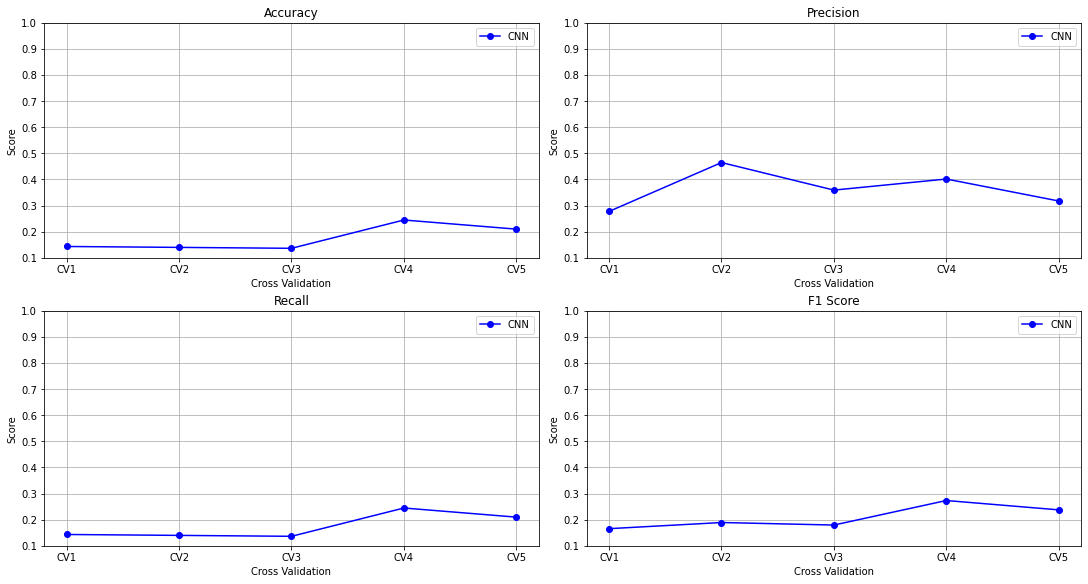

In [13]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,2,constrained_layout=True, figsize=(15,8))

axs[0,0].plot(CV, VALIDATION_ACCURACY, color='blue', marker='o', label = "CNN")
axs[0,0].set_title('Accuracy')
axs[0,0].set_xlabel('Cross Validation')
axs[0,0].set_ylabel('Score')
axs[0,0].set_ylim((0.1, 1))
axs[0,0].grid()
axs[0,0].legend()

axs[0,1].plot(CV, VALIDATION_PRECISION, color='blue', marker='o', label = "CNN")
axs[0,1].set_title('Precision')
axs[0,1].set_xlabel('Cross Validation')
axs[0,1].set_ylabel('Score')
axs[0,1].set_ylim((0.1, 1))
axs[0,1].grid()
axs[0,1].legend()

axs[1,0].plot(CV, VALIDATION_RECALL, color='blue', marker='o', label = "CNN")
axs[1,0].set_title('Recall')
axs[1,0].set_xlabel('Cross Validation')
axs[1,0].set_ylabel('Score')
axs[1,0].set_ylim((0.1, 1))
axs[1,0].grid()
axs[1,0].legend()

axs[1,1].plot(CV, VALIDATION_F1SCORE, color='blue', marker='o', label = "CNN")
axs[1,1].set_title('F1 Score')
axs[1,1].set_xlabel('Cross Validation')
axs[1,1].set_ylabel('Score')
axs[1,1].set_ylim((0.1, 1))
axs[1,1].grid()
axs[1,1].legend()

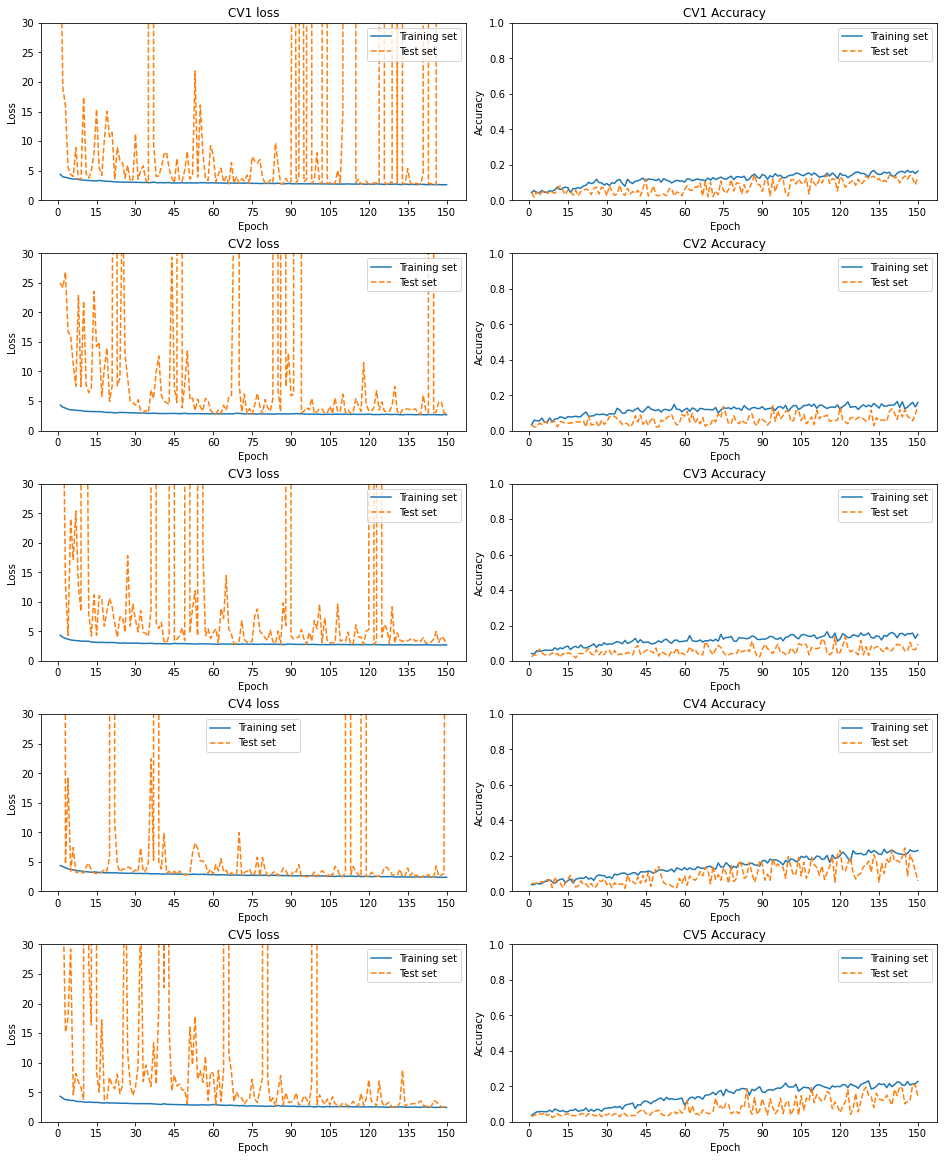

In [14]:
import matplotlib.pyplot as plt

n_epochs = 150
#set the x axis start from 1
x_axis = np.arange(1,151)

fig, ax = plt.subplots(5,2,constrained_layout=True, figsize=(13,16))

for i in range(5):
    for j in range(2):
        if(j==0):
            ax[i,j].set_title('CV' +str(i+1) + ' loss')
            ax[i,j].set_ylabel('Loss')
            ax[i,j].plot(x_axis, LOSS[i], label='Training set')
            ax[i,j].plot(x_axis, VAL_LOSS[i], label='Test set', linestyle='--')
            ax[i,j].set_xlabel('Epoch')
            ax[i,j].set_ylim((0, 30))
            ax[i,j].set_xticks(np.arange(0, 151, 15))
            ax[i,j].legend()
        else:
            ax[i,j].set_title('CV' +str(i+1) + ' Accuracy')
            ax[i,j].set_xlabel('Epoch')
            ax[i,j].set_ylabel('Accuracy')
            ax[i,j].plot(x_axis, ACCURACY[i], label='Training set')
            ax[i,j].plot(x_axis, VAL_ACCURACY[i], label='Test set', linestyle='--')
            ax[i,j].set_xlabel('Epoch')
            ax[i,j].set_ylim((0, 1))
            ax[i,j].set_xticks(np.arange(0, 151, 15))
            ax[i,j].legend()

In [15]:
for layer in model.layers:
    if 'conv' not in layer.name:
        continue
    filter, bias = layer.get_weights()
    print(layer.name, filter.shape)

conv2d_52 (3, 3, 1, 64)
conv2d_53 (3, 3, 64, 64)
conv2d_54 (3, 3, 64, 128)
conv2d_55 (3, 3, 128, 128)
conv2d_56 (3, 3, 128, 256)
conv2d_57 (3, 3, 256, 256)
conv2d_58 (3, 3, 256, 256)
conv2d_59 (3, 3, 256, 512)
conv2d_60 (3, 3, 512, 512)
conv2d_61 (3, 3, 512, 512)
conv2d_62 (3, 3, 512, 512)
conv2d_63 (3, 3, 512, 512)
conv2d_64 (3, 3, 512, 512)


In [16]:
for i in range(len(model.layers)):
    layer = model.layers[i]
    if 'conv' not in layer.name:
        continue
    print(i, layer.name, layer.output.shape)

0 conv2d_52 (None, 30, 30, 64)
2 conv2d_53 (None, 28, 28, 64)
5 conv2d_54 (None, 25, 25, 128)
7 conv2d_55 (None, 23, 23, 128)
10 conv2d_56 (None, 20, 20, 256)
12 conv2d_57 (None, 18, 18, 256)
14 conv2d_58 (None, 16, 16, 256)
17 conv2d_59 (None, 13, 13, 512)
19 conv2d_60 (None, 11, 11, 512)
21 conv2d_61 (None, 9, 9, 512)
24 conv2d_62 (None, 6, 6, 512)
26 conv2d_63 (None, 4, 4, 512)
28 conv2d_64 (None, 2, 2, 512)


In [19]:
from tensorflow.keras.models import Model
model = Model(inputs=model.inputs, outputs=model.layers[1].output)

1/1 [==============================] - 0s 172ms/step


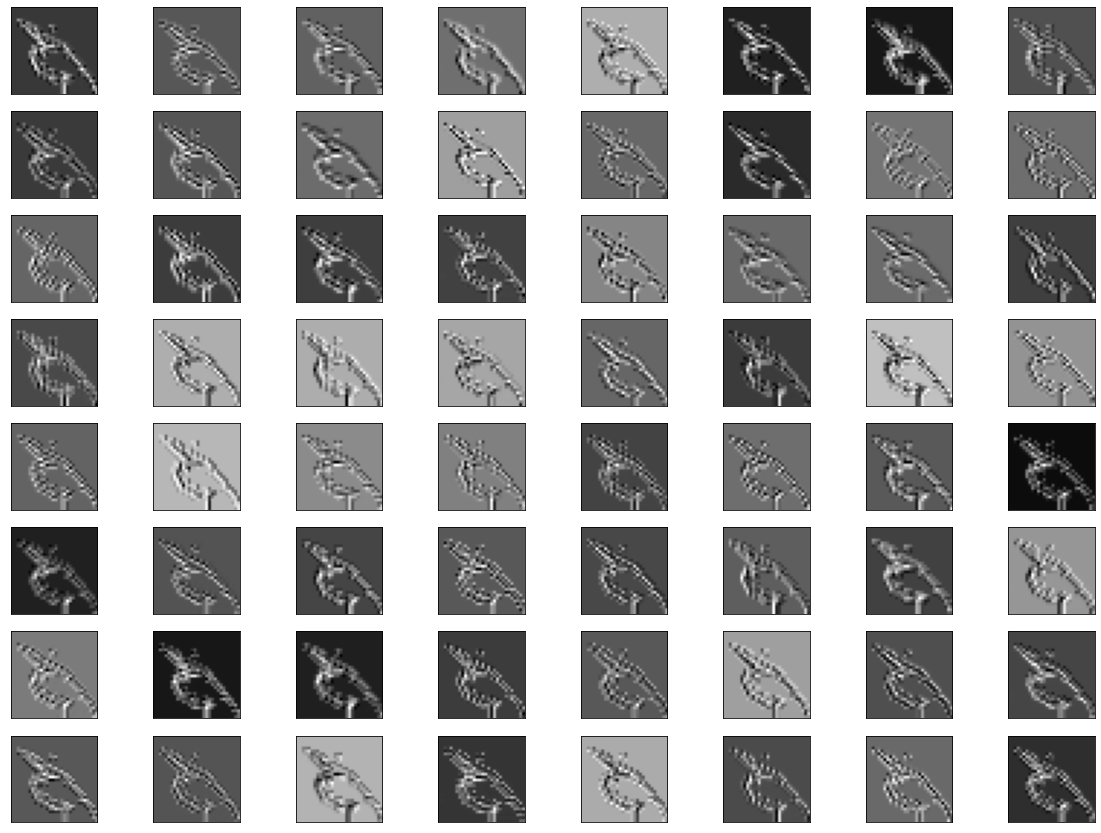

In [20]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
import numpy as np

image = load_img("Z6.jpg", target_size=(32,32), color_mode="grayscale")

image = img_to_array(image)
image = np.expand_dims(image, axis=0)

features = model.predict(image)
# image = preprocess_input(image)

fig = plt.figure(figsize=(20,15))
for i in range(1,features.shape[3]+1):
    plt.subplot(8,8,i)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(features[0,:,:,i-1], cmap='gray')
plt.show()

(1, 32, 32, 1)
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          (None, 30, 30, 64)        640       
                                                                 
 activation_48 (Activation)  (None, 30, 30, 64)        0         
                                                                 
 conv2d_40 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 activation_49 (Activation)  (None, 28, 28, 64)        0         
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 27, 27, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 25, 25, 128)       73856     
                                       

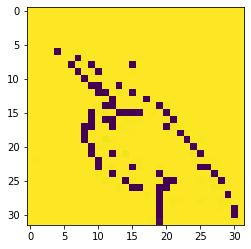

In [22]:
# img = load_img("A30.jpg", target_size=(64,64), color_mode="grayscale")

from tensorflow.keras.preprocessing.image import load_img, img_to_array 
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.vgg16 import preprocess_input
import matplotlib.pyplot as plt

#Prediction of single image
import numpy as np

img = load_img("Z6.jpg", target_size=(32,32), color_mode="grayscale")
image = img_to_array(img)
images = image/255
test_image = np.expand_dims(images, axis = 0)
# image_data = preprocess_input(test_image)
print(test_image.shape)

model = load_model('model_4.h5')
model.summary()
result = model.predict(test_image)
plt.imshow(img)
#training_set.class_indices
# print('Predicted Sign is:')
# print('')
img = np.argmax(model.predict(test_image), axis=1)
print('Prediction:',img)
if img == 0:
    print('A')
elif img == 1:
    print('B')
elif img == 2:
    print('C')
elif img == 3:
    print('D')
elif img == 4:
    print('E')
elif img == 5:
    print('F')
elif img == 6:
    print('G')
elif img == 7:
    print('H')
elif img == 8:
    print('I')
elif img == 9:
    print('J')
elif img == 10:
    print('K')
elif img == 11:
    print('L')
elif img == 12:
    print('M')
elif img == 13:
    print('N')
elif img == 14:
    print('O')
elif img == 15:
    print('P')
elif img == 16:
    print('Q')
elif img == 17:
    print('R')
elif img == 18:
    print('S')
elif img == 19:
    print('T')
elif img == 20:
    print('U')
elif img == 21:
    print('V')
elif img == 22:
    print('W')
elif img == 23:
    print('X')
elif img == 24:
    print('Y')
elif img == 25:
    print('Z')